In [1]:
pip install adjustText

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [15]:
mlb_2024 = pd.read_csv('/content/mlb_bat_2024 - Sheet1.csv')
mlb_2024

,Rk,Player,Year,Age,Team,Lg,WAR,G,PA,AB,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
0,1,Jarren Duran,2024,27,BOS,AL,8.7,160,735,671,...,134.0,330,6,6,1,3,1,*87,ASMVP-8,duranja01
1,2,Shohei Ohtani,2024,29,LAD,NL,9.2,159,731,636,...,190.0,411,7,6,0,5,10,*D,ASMVP-1SS,ohtansh01
2,3,Gunnar Henderson,2024,23,BAL,AL,9.1,159,719,630,...,157.0,333,2,7,0,4,1,*6/D,ASMVP-4,hendegu01
3,4,Marcus Semien,2024,33,TEX,AL,4.1,159,718,650,...,100.0,254,9,3,0,1,2,*4,AS,semiema01
4,5,Juan Soto,2024,25,NYY,AL,7.9,157,713,576,...,179.0,328,10,4,0,4,2,*9/7DH,ASMVP-3SS,sotoju01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,737,Justin Wilson,2024,36,CIN,NL,0.0,1,0,0,...,NaN,0,0,0,0,0,0,1,NaN,wilsoju10
891,738,Josh Winckowski,2024,26,BOS,AL,0.0,1,0,0,...,NaN,0,0,0,0,0,0,1,NaN,winckjo01
892,739,Kirby Yates,2024,37,TEX,AL,0.0,3,0,0,...,NaN,0,0,0,0,0,0,1,ASCYA-8,yateski01
893,740,Alex Young,2024,30,CIN,NL,0.0,1,0,0,...,NaN,0,0,0,0,0,0,/1,NaN,youngal01


Fill missing values

In [16]:
mlb_2024.fillna(0, inplace=True)

Filter Players who were Top 25 in WAR

In [17]:
mlb_filter = mlb_2024.nlargest(25, 'WAR').copy()
mlb_filter

,Rk,Player,Year,Age,Team,Lg,WAR,G,PA,AB,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
6,7,Aaron Judge,2024,32,NYY,AL,10.8,158,704,559,...,223.0,392,22,9,0,2,20,*8D/97,ASMVP-1SS,judgeaa01
5,6,Bobby Witt Jr.,2024,24,KCR,AL,9.4,161,709,636,...,171.0,374,4,8,0,8,9,*6/D,ASMVP-2GGSS,wittbo02
1,2,Shohei Ohtani,2024,29,LAD,NL,9.2,159,731,636,...,190.0,411,7,6,0,5,10,*D,ASMVP-1SS,ohtansh01
2,3,Gunnar Henderson,2024,23,BAL,AL,9.1,159,719,630,...,157.0,333,2,7,0,4,1,*6/D,ASMVP-4,hendegu01
0,1,Jarren Duran,2024,27,BOS,AL,8.7,160,735,671,...,134.0,330,6,6,1,3,1,*87,ASMVP-8,duranja01
4,5,Juan Soto,2024,25,NYY,AL,7.9,157,713,576,...,179.0,328,10,4,0,4,2,*9/7DH,ASMVP-3SS,sotoju01
42,39,Matt Chapman,2024,31,SFG,NL,7.1,154,647,575,...,129.0,266,13,6,0,2,3,*5/H,MVP-11GG,chapmma01
13,14,Francisco Lindor,2024,30,NYM,NL,6.9,152,689,618,...,141.0,309,7,12,0,3,0,*6/DH,MVP-2SS,lindofr01
20,21,José Ramírez,2024,31,CLE,AL,6.8,158,682,620,...,140.0,333,9,1,0,6,12,*5D,ASMVP-5SS,ramirjo01
100,87,Ketel Marte,2024,30,ARI,NL,6.8,136,583,504,...,155.0,282,9,5,0,9,7,*4D/H6,ASMVP-3SS,marteke01


Group Clusters based on Feature Selection for Power Hitters and Base Stealers

In [18]:
features = ["HR", "SLG", "OPS", "BA", "OBP", "SO", "SB", "CS"]
mlb_cluster = mlb_filter[features].copy()

In [19]:
mlb_cluster

,HR,SLG,OPS,BA,OBP,SO,SB,CS
6,58,0.701,1.159,0.322,0.458,171,10,0
5,32,0.588,0.977,0.332,0.389,106,31,12
1,54,0.646,1.036,0.310,0.390,162,59,4
2,37,0.529,0.893,0.281,0.364,159,21,4
0,21,0.492,0.834,0.285,0.342,160,34,7
4,41,0.569,0.989,0.288,0.419,119,7,4
42,27,0.463,0.790,0.247,0.328,158,15,2
13,33,0.500,0.844,0.273,0.344,127,29,4
20,39,0.537,0.872,0.279,0.335,82,41,7
100,36,0.560,0.932,0.292,0.372,106,7,1


Normalize our Features

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mlb_cluster)

PCA for dimensionality

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Add Features to our DataFrame

In [22]:
mlb_filter = mlb_filter.assign(PCA1=X_pca[:, 0], PCA2=X_pca[:, 1])

In [23]:
mlb_filter

,Rk,Player,Year,Age,Team,Lg,WAR,G,PA,AB,...,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional,PCA1,PCA2
6,7,Aaron Judge,2024,32,NYY,AL,10.8,158,704,559,...,22,9,0,2,20,*8D/97,ASMVP-1SS,judgeaa01,5.494209,0.262057
5,6,Bobby Witt Jr.,2024,24,KCR,AL,9.4,161,709,636,...,4,8,0,8,9,*6/D,ASMVP-2GGSS,wittbo02,1.853618,1.633549
1,2,Shohei Ohtani,2024,29,LAD,NL,9.2,159,731,636,...,7,6,0,5,10,*D,ASMVP-1SS,ohtansh01,3.083730,2.378930
2,3,Gunnar Henderson,2024,23,BAL,AL,9.1,159,719,630,...,2,7,0,4,1,*6/D,ASMVP-4,hendegu01,0.557573,0.484070
0,1,Jarren Duran,2024,27,BOS,AL,8.7,160,735,671,...,6,6,1,3,1,*87,ASMVP-8,duranja01,-0.896121,1.169006
4,5,Juan Soto,2024,25,NYY,AL,7.9,157,713,576,...,10,4,0,4,2,*9/7DH,ASMVP-3SS,sotoju01,2.243167,-0.355412
42,39,Matt Chapman,2024,31,SFG,NL,7.1,154,647,575,...,13,6,0,2,3,*5/H,MVP-11GG,chapmma01,-1.500465,-0.375690
13,14,Francisco Lindor,2024,30,NYM,NL,6.9,152,689,618,...,7,12,0,3,0,*6/DH,MVP-2SS,lindofr01,-0.364374,0.271251
20,21,José Ramírez,2024,31,CLE,AL,6.8,158,682,620,...,9,1,0,6,12,*5D,ASMVP-5SS,ramirjo01,0.045827,0.817776
100,87,Ketel Marte,2024,30,ARI,NL,6.8,136,583,504,...,9,5,0,9,7,*4D/H6,ASMVP-3SS,marteke01,1.347442,-1.057131


Create KMeans Clusters

In [24]:
mlb_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
mlb_filter["Cluster"] = mlb_kmeans.fit_predict(X_pca)

In [25]:
mlb_filter[['Player', 'PCA1', 'PCA2', 'Cluster']]

,Player,PCA1,PCA2,Cluster
6,Aaron Judge,5.494209,0.262057,1
5,Bobby Witt Jr.,1.853618,1.633549,1
1,Shohei Ohtani,3.083730,2.378930,1
2,Gunnar Henderson,0.557573,0.484070,0
0,Jarren Duran,-0.896121,1.169006,2
4,Juan Soto,2.243167,-0.355412,0
42,Matt Chapman,-1.500465,-0.375690,2
13,Francisco Lindor,-0.364374,0.271251,0
20,José Ramírez,0.045827,0.817776,0
100,Ketel Marte,1.347442,-1.057131,0


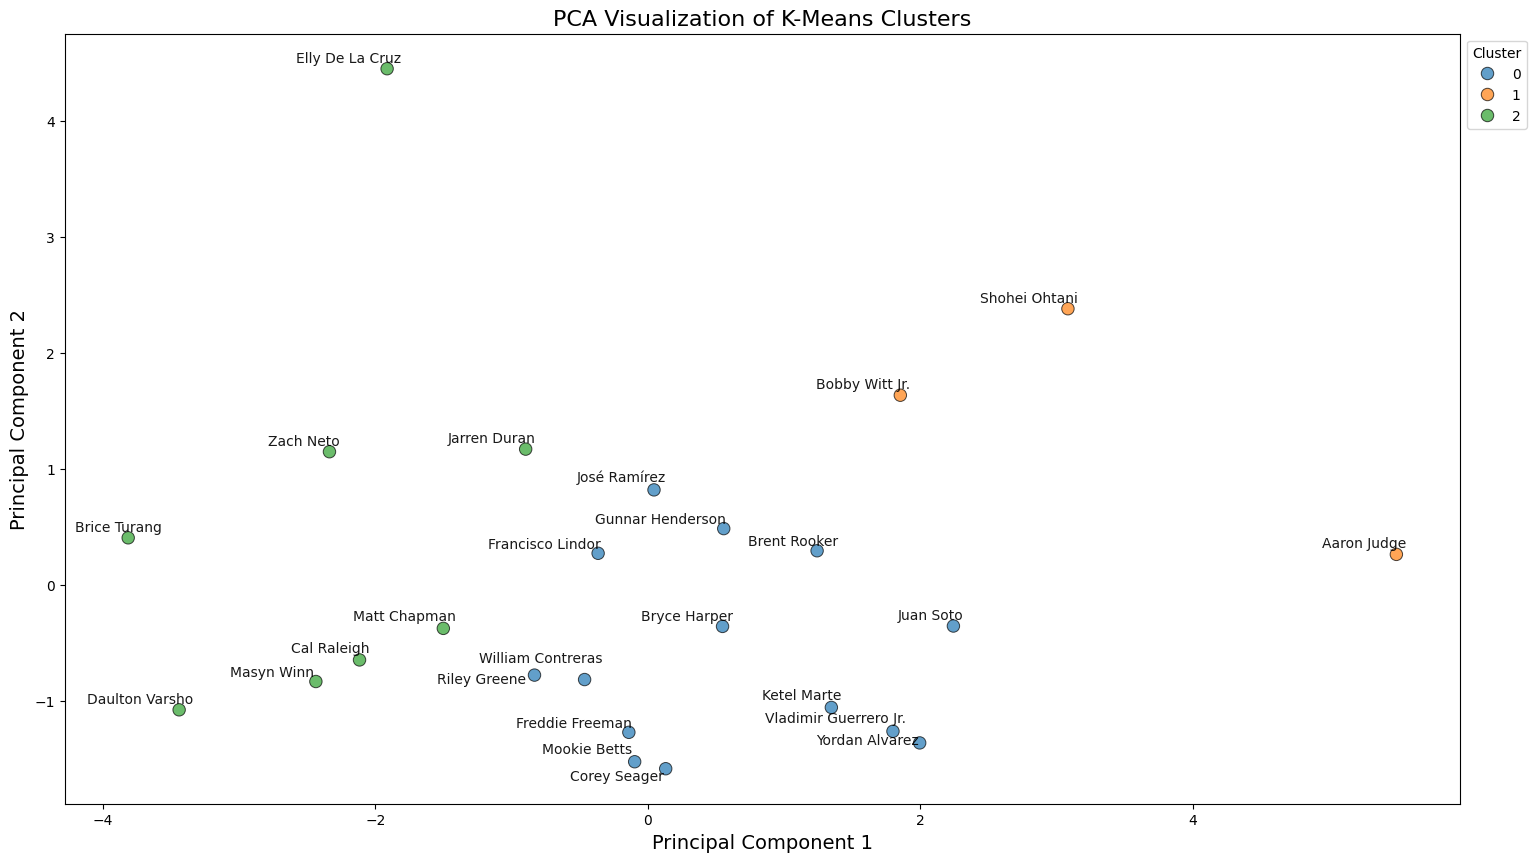

In [26]:
plt.figure(figsize=(18, 10))

# Scatter plot with improved settings
sns.scatterplot(x=mlb_filter["PCA1"], y=mlb_filter["PCA2"], hue=mlb_filter["Cluster"],
                palette="tab10", s=80, alpha=0.7, edgecolor="black")

# Annotate each point with the player's name
texts = []
for i in range(mlb_filter.shape[0]):
    texts.append(plt.text(mlb_filter["PCA1"].iloc[i], mlb_filter["PCA2"].iloc[i],
                          mlb_filter["Player"].iloc[i], fontsize=10, alpha=0.9,
                          color='black', ha='right', va='bottom'))

# Adjust overlapping labels
adjust_text(texts)

plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.title("PCA Visualization of K-Means Clusters", fontsize=16)
plt.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1, 1))

plt.show()